In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import (
    SequentialFeatureSelector,
)
from mlxtend.evaluate import feature_importance_permutation
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.utils.estimator_checks import check_estimator
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
import matplotlib.ticker as ticker
import os

os.chdir("../../")
from pathlib import Path
import json

import sys

sys.path.append("scripts")

import utils
import distclassipy as dcpy

cd = dcpy.Distance()

In [2]:
with open("settings.txt") as f:
    settings_dict = json.load(f)
np.random.seed(settings_dict["seed_choice"])

classification_letter = "a"
classification_problem = settings_dict["classification_problem"][classification_letter]
classes_to_keep = settings_dict["classes_to_keep"][classification_letter]
results_subfolder = f"{classification_letter}. {classification_problem}"
sns_dict = settings_dict["sns_dict"]

sns.set_theme(**sns_dict)

In [3]:
check_estimator(dcpy.DistanceMetricClassifier())  # passes

In [4]:
# Load Data
X_df_FULL = pd.read_csv("data/X_df.csv", index_col=0)
y_df_FULL = pd.read_csv("data/y_df.csv", index_col=0)

In [5]:
# Remove manually selected 'bad' features
with open(os.path.join("results", results_subfolder, "drop_features.txt")) as f:
    bad_features = json.load(f)  # manually selected

X_df_FULL = X_df_FULL.drop(bad_features, axis=1)

print(X_df_FULL.shape[1])

30


In [6]:
# one-vs-rest special
posclass_df = y_df_FULL[y_df_FULL["class"].isin(classes_to_keep)]
negclass_df = y_df_FULL[~y_df_FULL["class"].isin(classes_to_keep)].sample(
    n=len(posclass_df), random_state=settings_dict["seed_choice"]
)

# negclass_df["class"].value_counts()
negclass_df["class"] = f"Not{classes_to_keep[0]}"

y_df = pd.concat([posclass_df, negclass_df]).sample(
    frac=1, random_state=settings_dict["seed_choice"]
)  # Shuffle
X_df = X_df_FULL.loc[y_df.index]
X = X_df.to_numpy()
y = y_df.to_numpy().ravel()

In [7]:
feats_top_plot = 15
### For plotting only - how many features to plot in relative importance

### Distance Based

In [8]:
all_metrics = settings_dict["all_metrics"]

scoring = "f1_macro"
feats_to_keep = X_df_FULL.columns

In [9]:
allns = []
all_selected_scores = []
all_metric_strs = []

Metric:   0%|          | 0/18 [00:00<?, ?it/s]

******************** Euclidean ********************


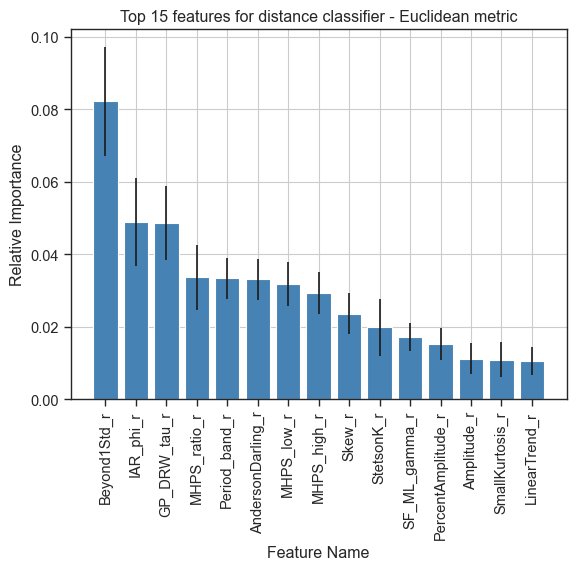

Euclidean: Selected 3 features: ['Harmonics_phase_3_r', 'Beyond1Std_r', 'Gskew_r']


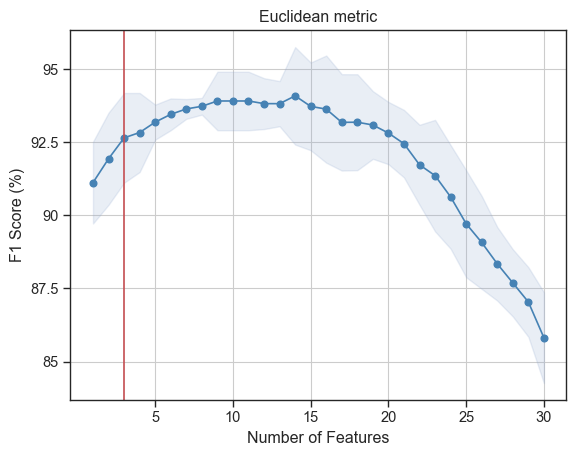

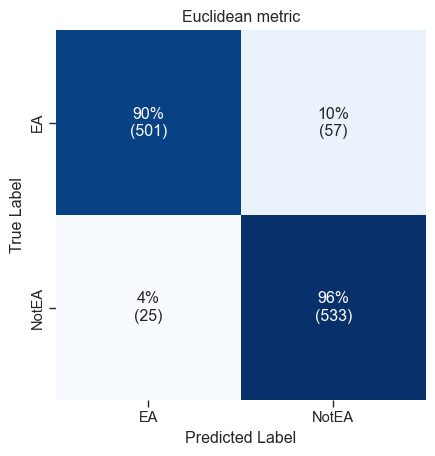

F1 = 92.65 %
Accuracy = 92.65 %
Matthew's Coefficient = 85.45 %
******************** Braycurtis ********************


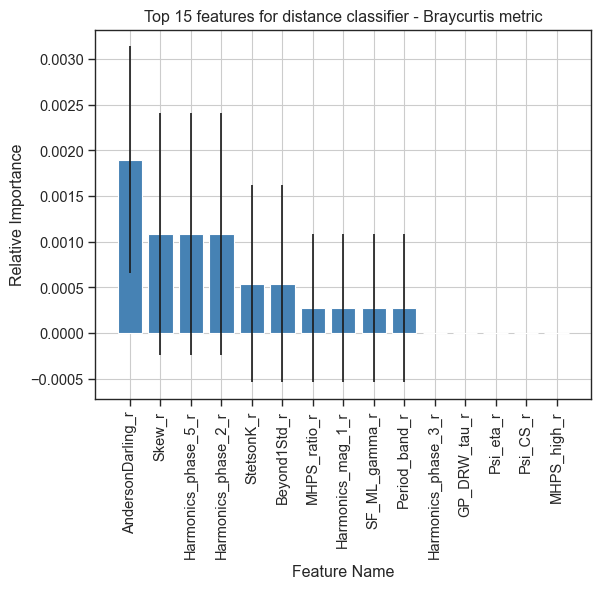

Braycurtis: Selected 4 features: ['Harmonics_phase_3_r', 'Beyond1Std_r', 'Mean_r', 'Skew_r']


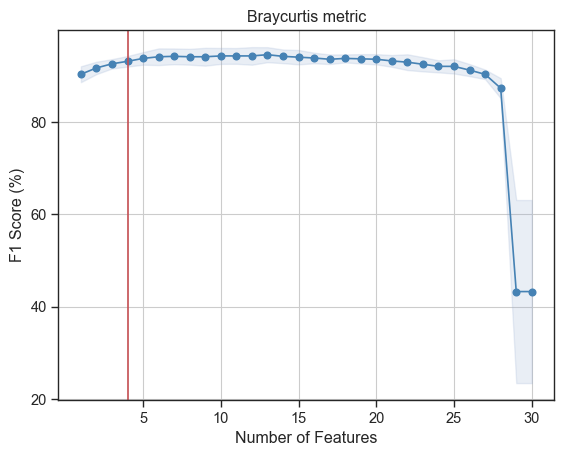

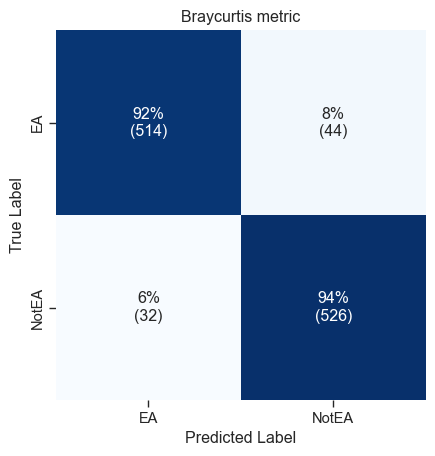

F1 = 93.19 %
Accuracy = 93.19 %
Matthew's Coefficient = 86.40 %
******************** Canberra ********************


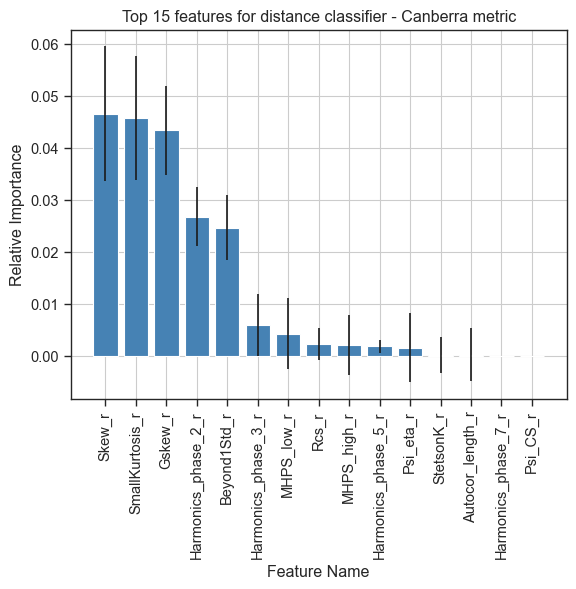

Canberra: Selected 1 features: ['Beyond1Std_r']


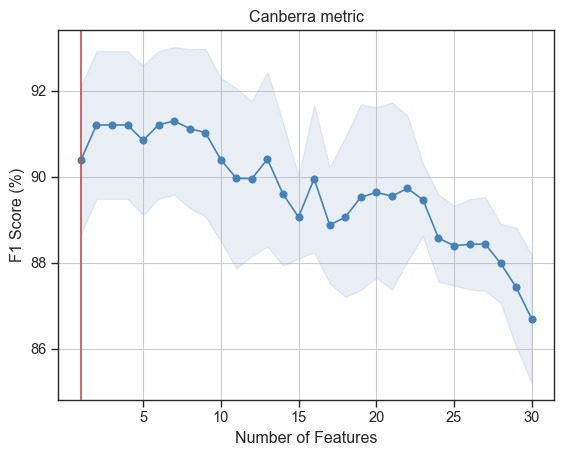

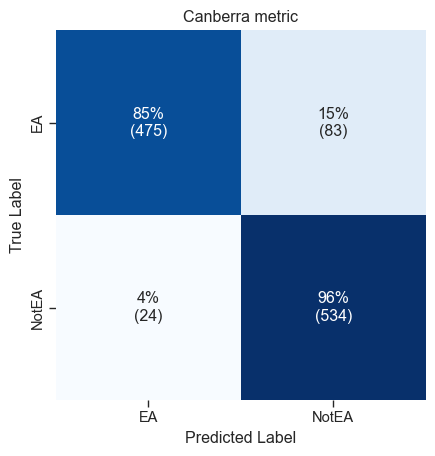

F1 = 90.39 %
Accuracy = 90.41 %
Matthew's Coefficient = 81.28 %
******************** Cityblock ********************


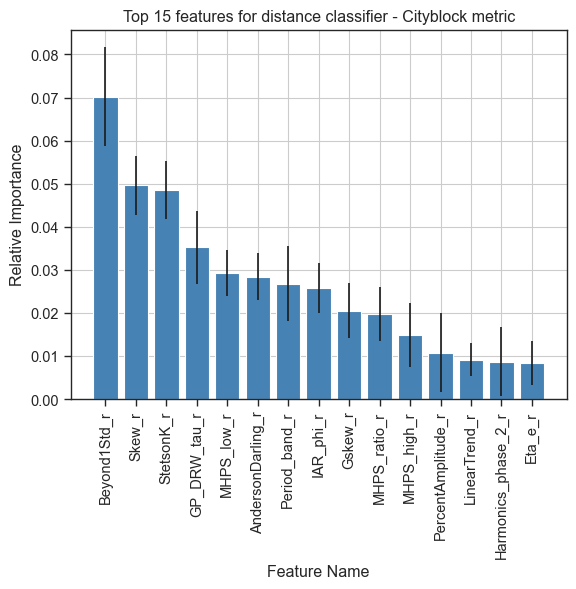

Cityblock: Selected 4 features: ['Harmonics_phase_3_r', 'Beyond1Std_r', 'Gskew_r', 'Mean_r']


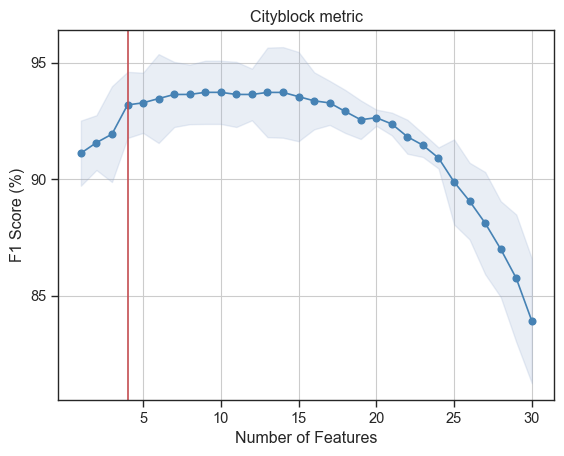

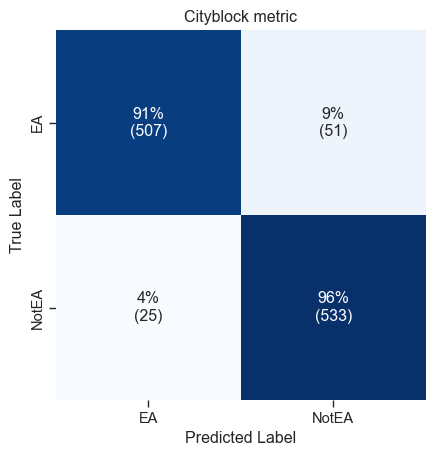

F1 = 93.19 %
Accuracy = 93.19 %
Matthew's Coefficient = 86.47 %
******************** Chebyshev ********************


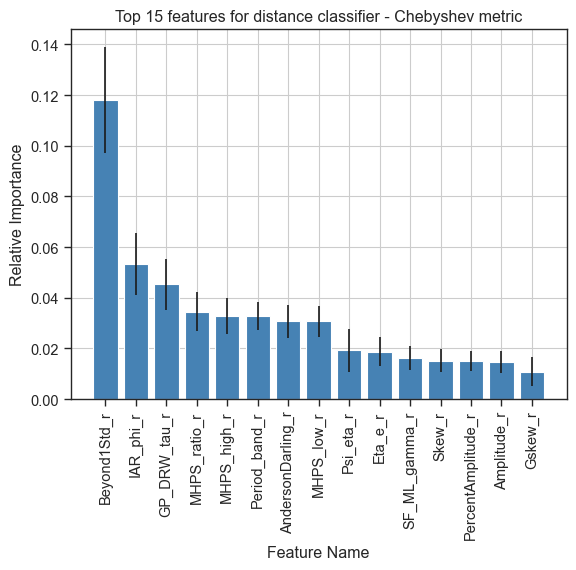

Chebyshev: Selected 4 features: ['Harmonics_phase_3_r', 'Beyond1Std_r', 'Skew_r', 'SmallKurtosis_r']


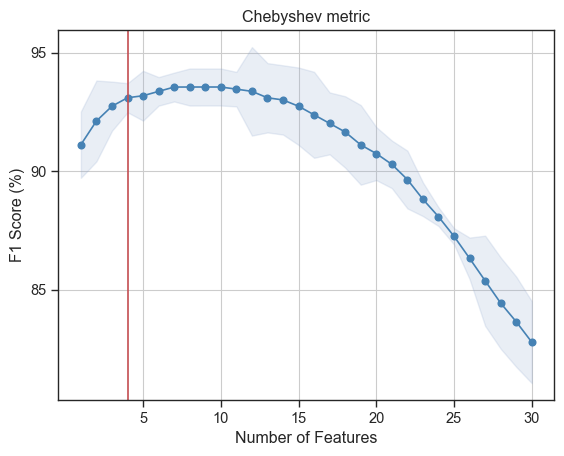

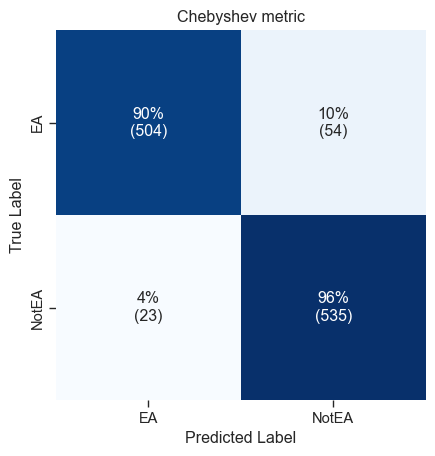

F1 = 93.10 %
Accuracy = 93.10 %
Matthew's Coefficient = 86.33 %
******************** Clark ********************


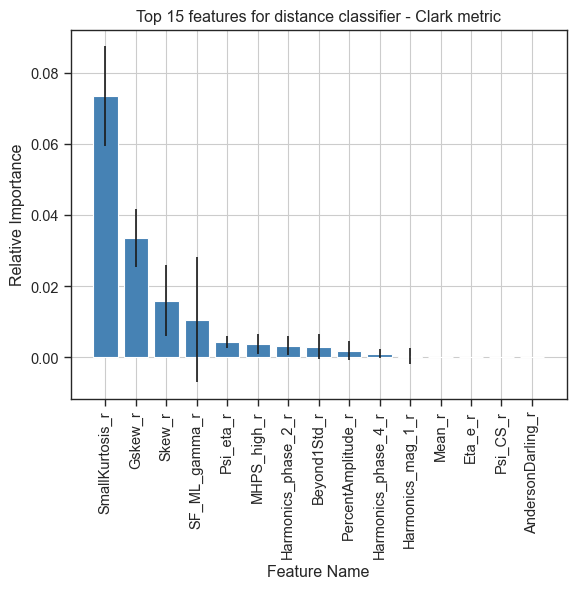

Clark: Selected 1 features: ['Beyond1Std_r']


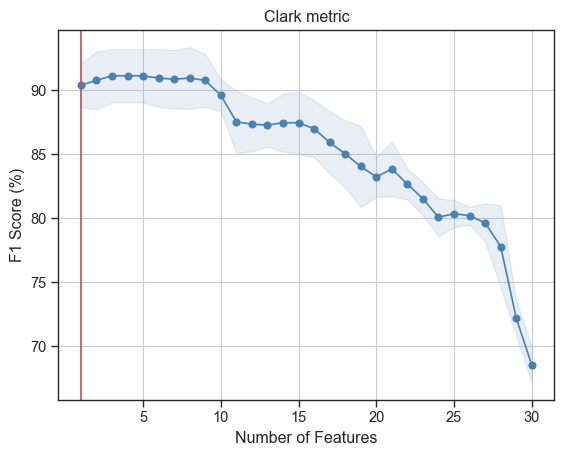

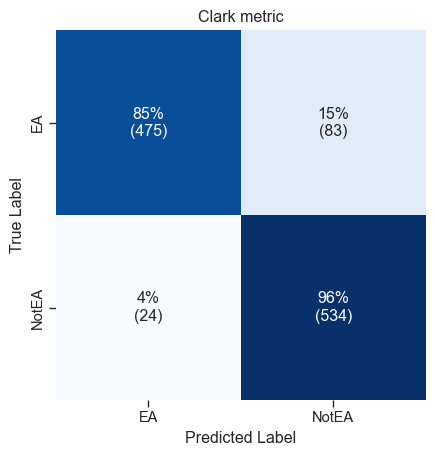

F1 = 90.39 %
Accuracy = 90.41 %
Matthew's Coefficient = 81.28 %
******************** Correlation ********************


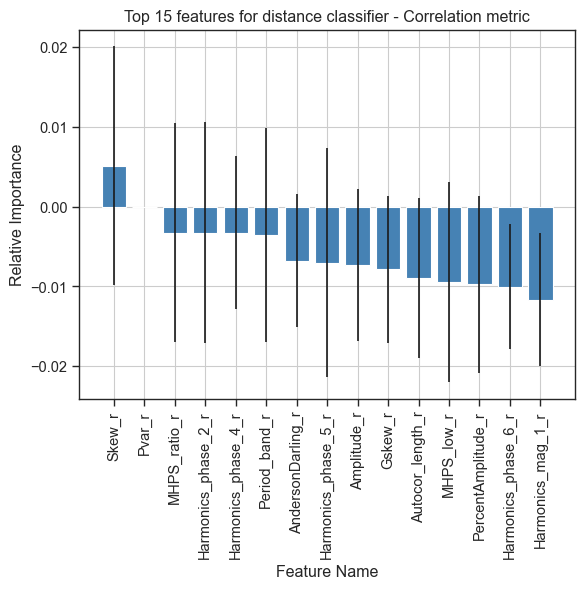

Correlation: Selected 4 features: ['MHPS_ratio_r', 'MHPS_high_r', 'Amplitude_r', 'Gskew_r']


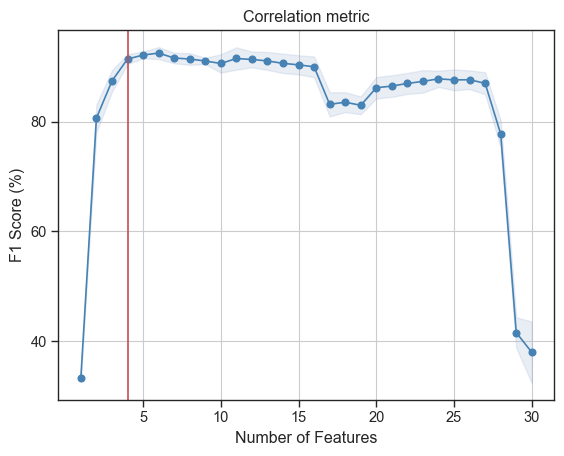

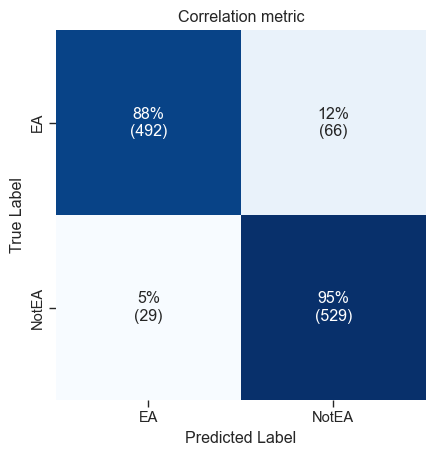

F1 = 91.48 %
Accuracy = 91.49 %
Matthew's Coefficient = 83.16 %
******************** Cosine ********************


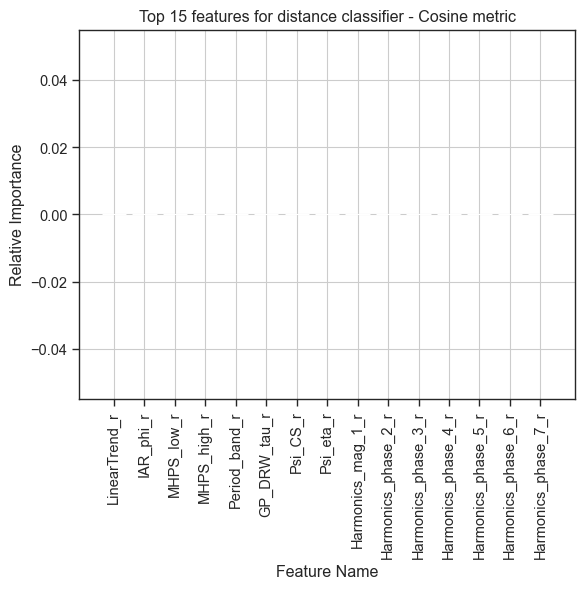

Cosine: Selected 5 features: ['Eta_e_r', 'PercentAmplitude_r', 'Skew_r', 'SmallKurtosis_r', 'IAR_phi_r']


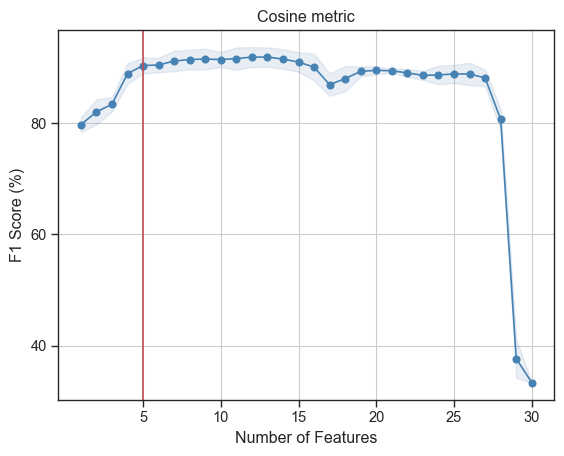

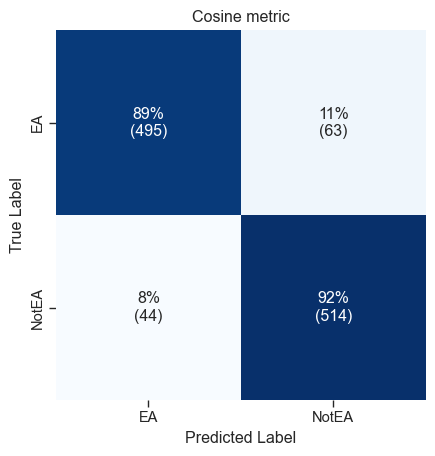

F1 = 90.41 %
Accuracy = 90.41 %
Matthew's Coefficient = 80.87 %
******************** Hellinger ********************


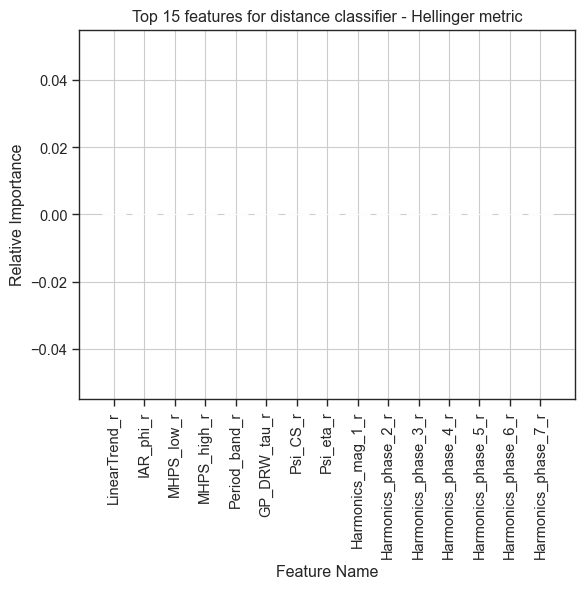

Hellinger: Selected 2 features: ['Harmonics_phase_6_r', 'Beyond1Std_r']


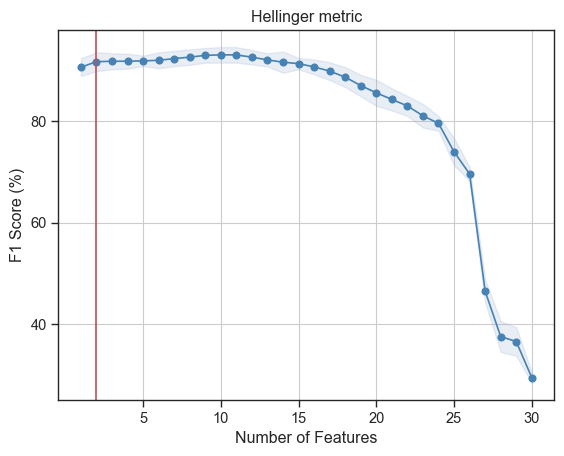

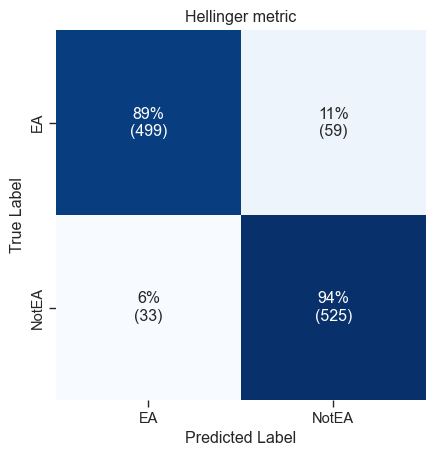

F1 = 91.75 %
Accuracy = 91.76 %
Matthew's Coefficient = 83.60 %


******************** Jaccard ********************


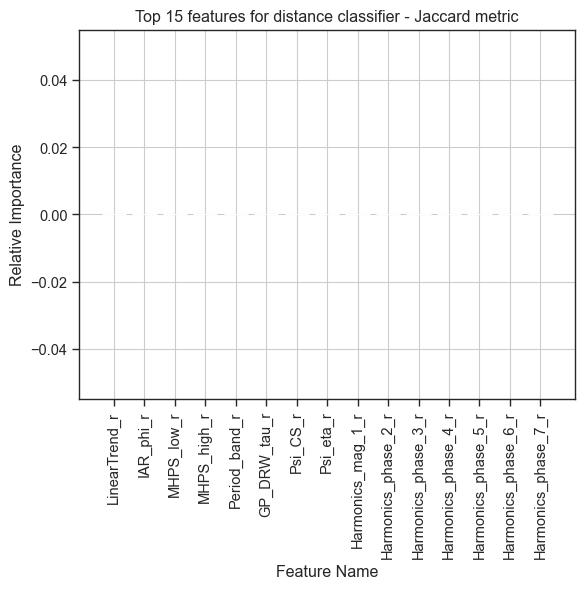

Jaccard: Selected 6 features: ['Harmonics_phase_3_r', 'Harmonics_phase_4_r', 'Beyond1Std_r', 'Mean_r', 'Skew_r', 'SmallKurtosis_r']


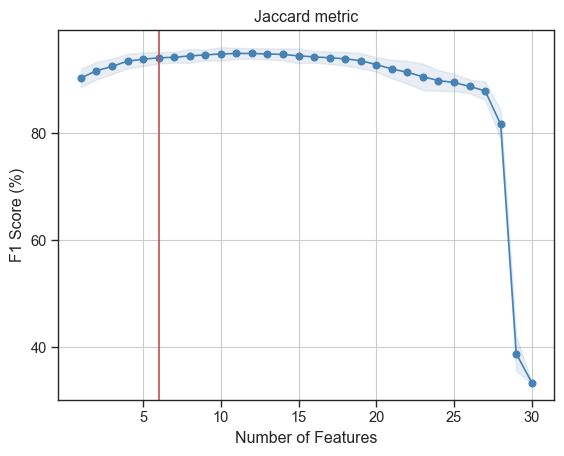

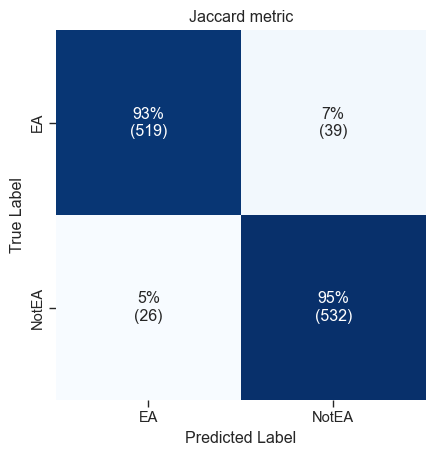

F1 = 94.17 %
Accuracy = 94.18 %
Matthew's Coefficient = 88.38 %
******************** Lorentzian ********************


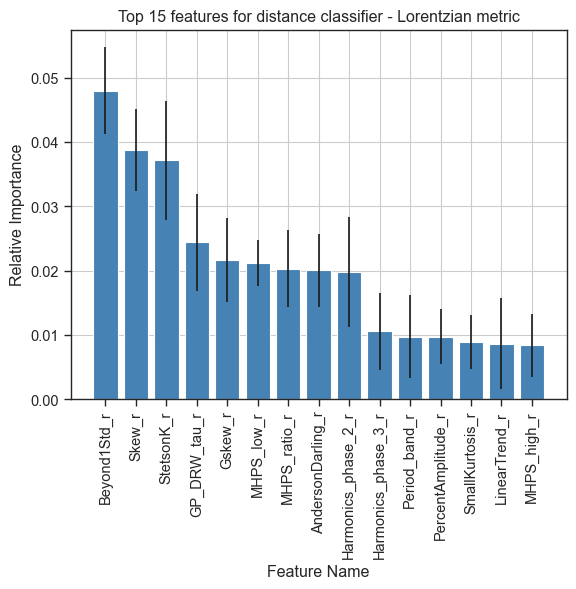

Lorentzian: Selected 8 features: ['Period_band_r', 'Psi_CS_r', 'Harmonics_phase_3_r', 'Harmonics_phase_7_r', 'AndersonDarling_r', 'Beyond1Std_r', 'Mean_r', 'Skew_r']


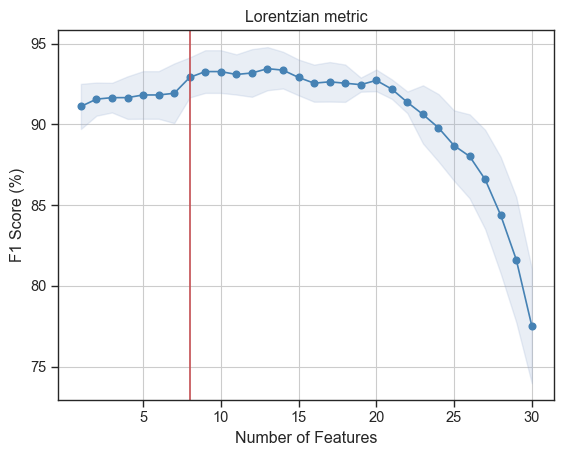

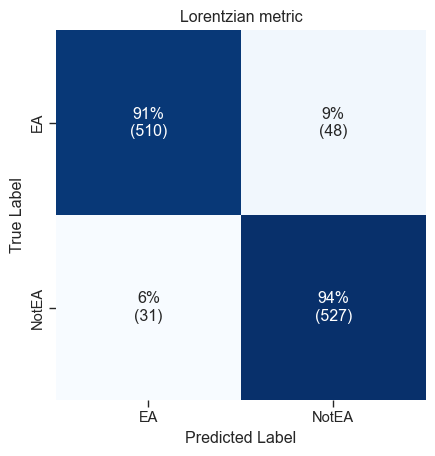

F1 = 92.92 %
Accuracy = 92.92 %
Matthew's Coefficient = 85.88 %
******************** Marylandbridge ********************


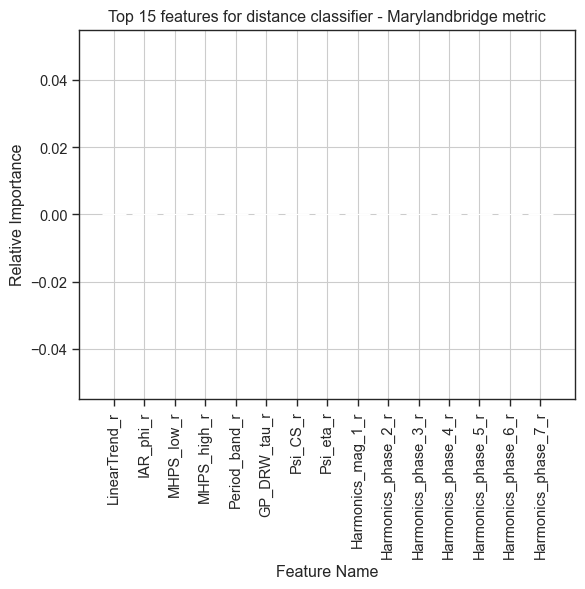

Marylandbridge: Selected 17 features: ['MHPS_high_r', 'Period_band_r', 'Psi_CS_r', 'Psi_eta_r', 'Harmonics_mag_1_r', 'Harmonics_phase_6_r', 'Harmonics_phase_7_r', 'Autocor_length_r', 'Beyond1Std_r', 'Eta_e_r', 'Gskew_r', 'Mean_r', 'Rcs_r', 'Skew_r', 'SmallKurtosis_r', 'IAR_phi_r', 'LinearTrend_r']


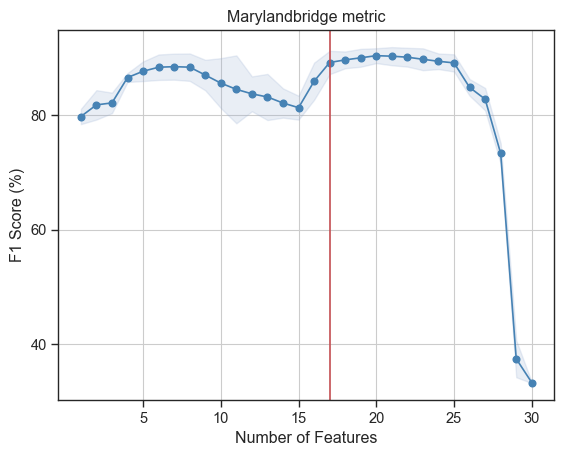

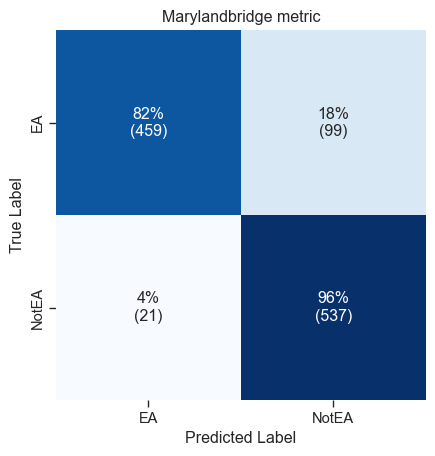

F1 = 89.19 %
Accuracy = 89.25 %
Matthew's Coefficient = 79.27 %


******************** Meehl ********************


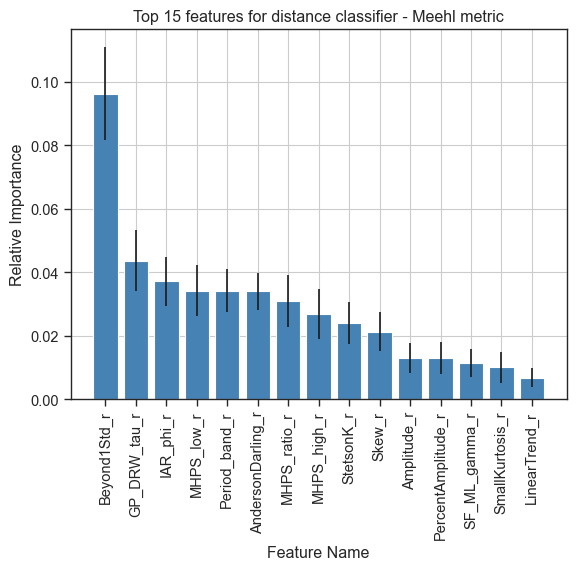

Meehl: Selected 6 features: ['MHPS_ratio_r', 'Autocor_length_r', 'Beyond1Std_r', 'Gskew_r', 'SmallKurtosis_r', 'StetsonK_r']


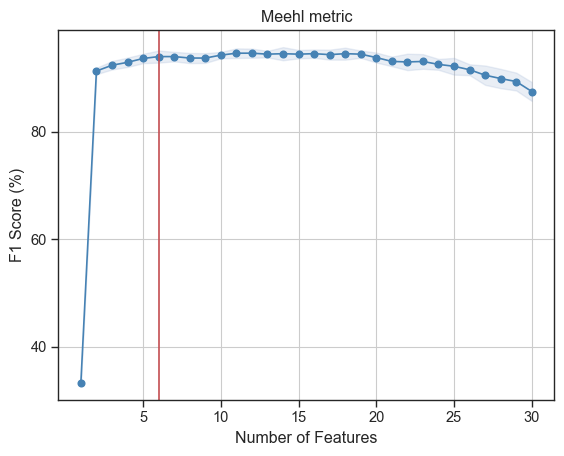

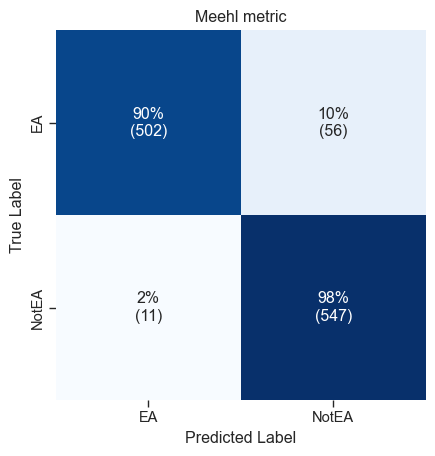

F1 = 93.99 %
Accuracy = 94.00 %
Matthew's Coefficient = 88.28 %
******************** Motyka ********************


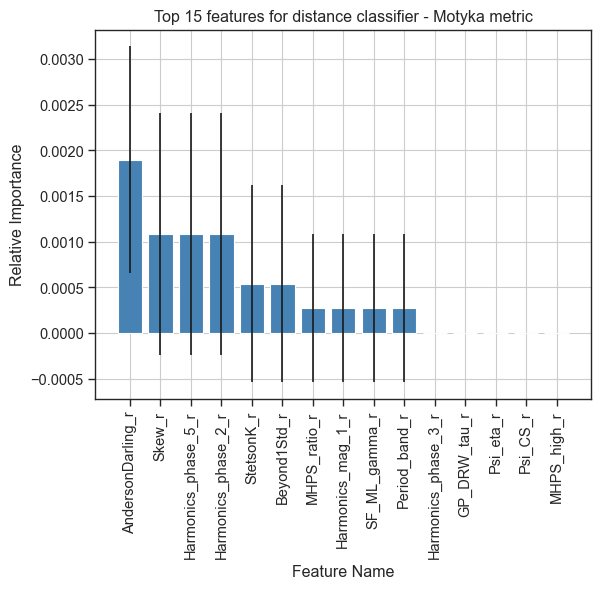

Motyka: Selected 4 features: ['Harmonics_phase_3_r', 'Beyond1Std_r', 'Gskew_r', 'Mean_r']


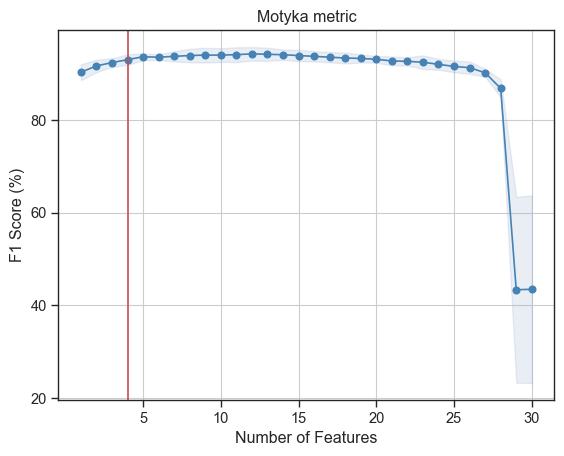

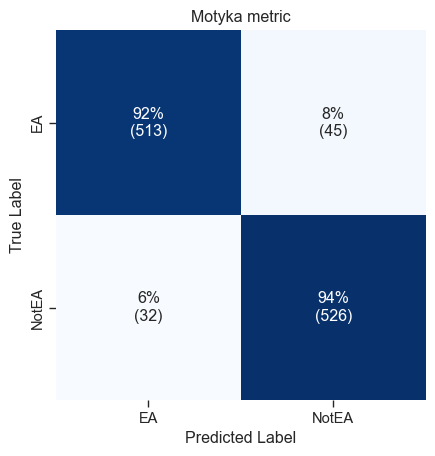

F1 = 93.10 %
Accuracy = 93.10 %
Matthew's Coefficient = 86.22 %
******************** Soergel ********************


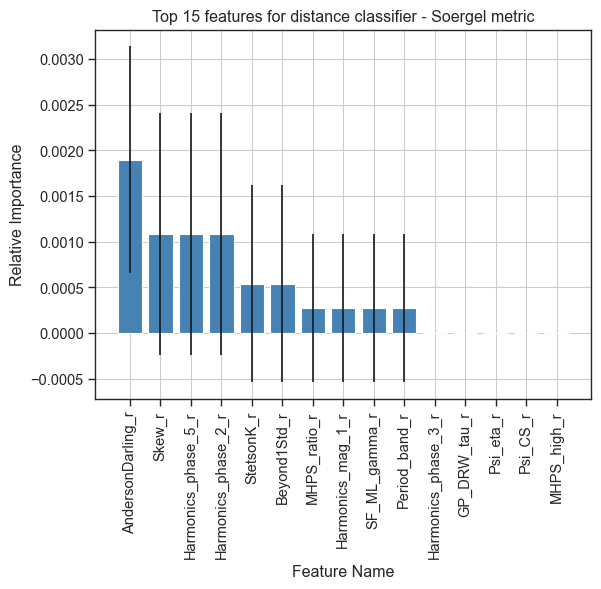

Soergel: Selected 4 features: ['Harmonics_phase_3_r', 'Beyond1Std_r', 'Gskew_r', 'Mean_r']


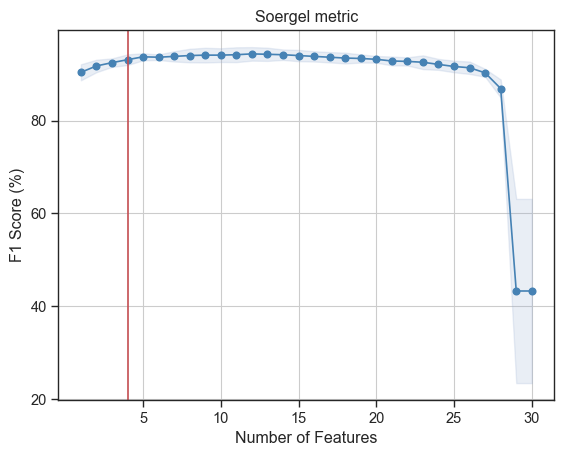

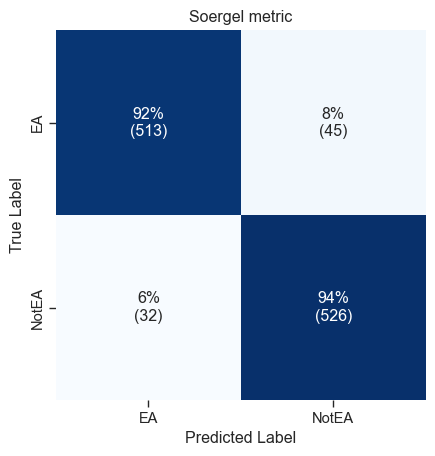

F1 = 93.10 %
Accuracy = 93.10 %
Matthew's Coefficient = 86.22 %


******************** Wave_Hedges ********************


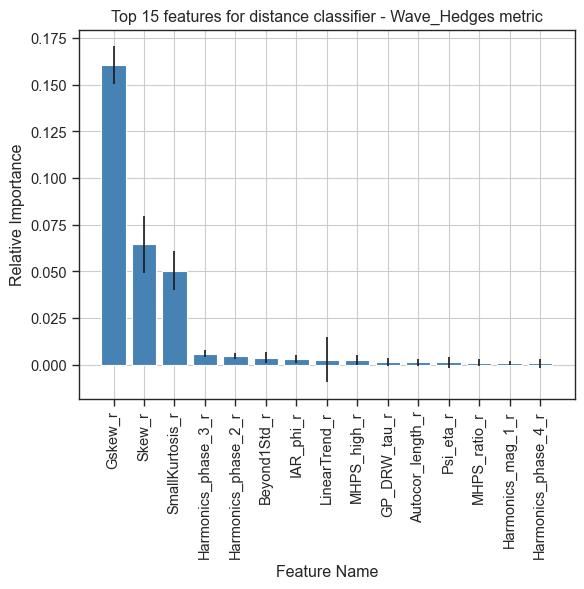

Wave_Hedges: Selected 1 features: ['Beyond1Std_r']


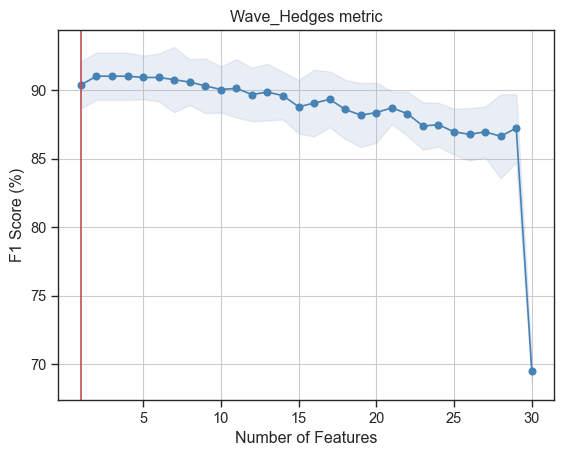

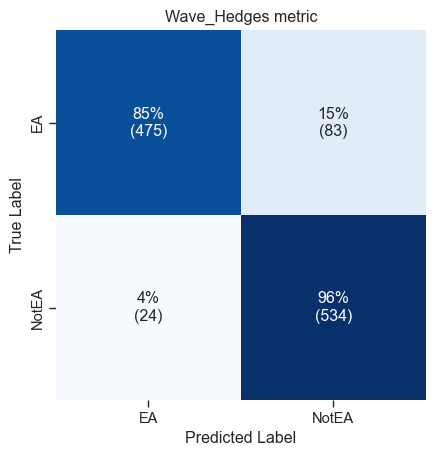

F1 = 90.39 %
Accuracy = 90.41 %
Matthew's Coefficient = 81.28 %
******************** Kulczynski ********************


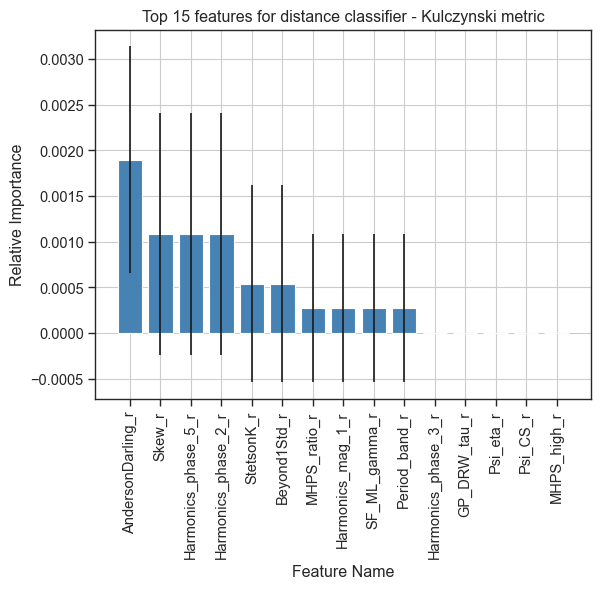

Kulczynski: Selected 5 features: ['GP_DRW_tau_r', 'Harmonics_phase_3_r', 'Beyond1Std_r', 'Mean_r', 'Skew_r']


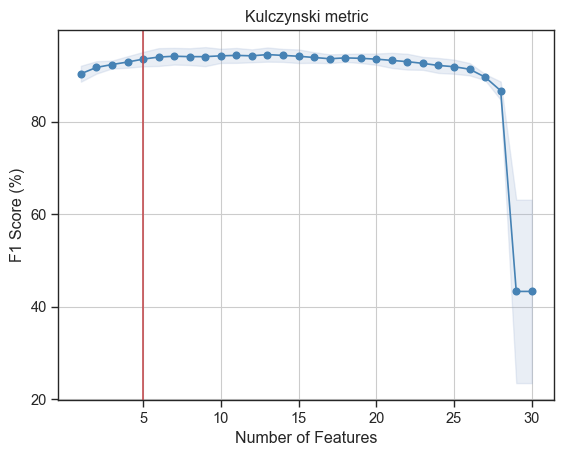

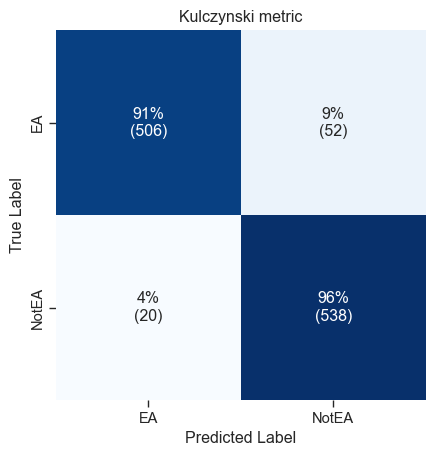

F1 = 93.54 %
Accuracy = 93.55 %
Matthew's Coefficient = 87.24 %


******************** Add_Chisq ********************


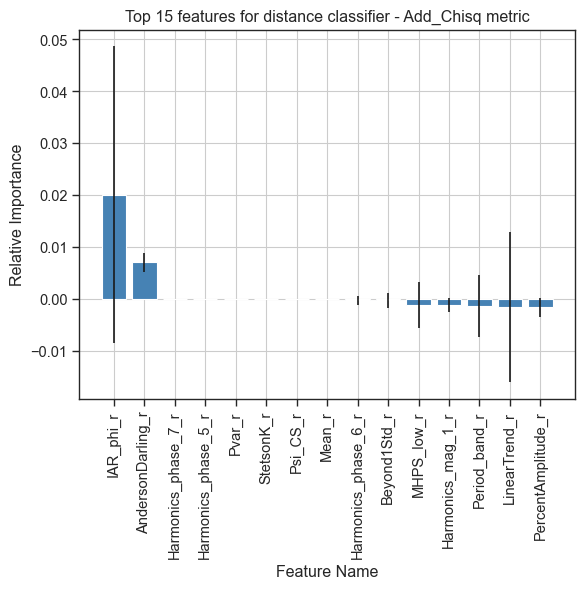

Add_Chisq: Selected 1 features: ['Beyond1Std_r']


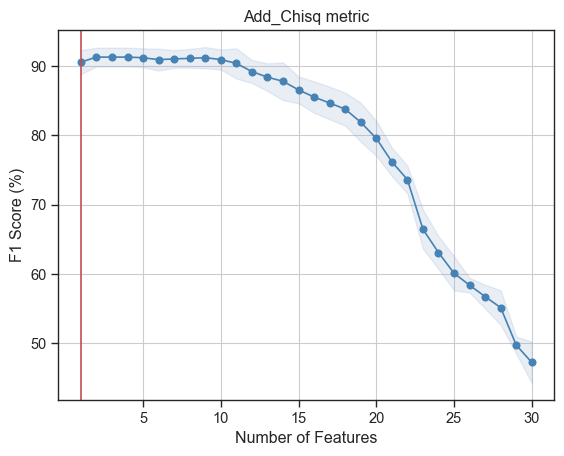

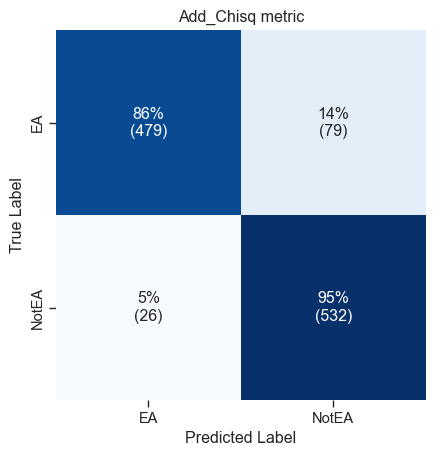

F1 = 90.57 %
Accuracy = 90.59 %
Matthew's Coefficient = 81.55 %


F1 = 90.57 %
Accuracy = 90.59 %
Matthew's Coefficient = 81.55 %


F1 = 91.02 %
Accuracy = 91.04 %
Matthew's Coefficient = 82.47 %


F1 = 91.88 %
Accuracy = 91.85 %
Matthew's Coefficient = 89.14 %


In [10]:
for metric in tqdm(all_metrics, desc="Metric", leave=True):
    metric_str = utils.get_metric_name(metric)
    locpath = os.path.join("results", results_subfolder, "distclassipy", metric_str)
    print("*" * 20, metric_str, "*" * 20)
    Path(locpath).mkdir(parents=True, exist_ok=True)

    # Feature Importance via Feature Permutation

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, stratify=y, random_state=settings_dict["seed_choice"]
    )

    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric,
        scale=True,
        central_stat=settings_dict["central_stat"],
        dispersion_stat=settings_dict["dispersion_stat"],
        calculate_kde=False,
        calculate_1d_dist=False,
    )
    lcdc.fit(X_train, y_train)

    imp_vals, imp_all = feature_importance_permutation(
        predict_method=lcdc.predict,
        X=X_test,
        y=y_test,
        metric="accuracy",
        num_rounds=10,
        seed=settings_dict["seed_choice"],
    )

    std = np.std(imp_all, axis=1)
    indices = np.argsort(imp_vals)[::-1]

    x_ax = range(X.shape[1])
    y_ax = imp_vals[indices]
    yerr = std[indices]
    featnames = X_df.columns[indices]

    fig, ax = plt.subplots()
    ax.bar(x_ax[:feats_top_plot], y_ax[:feats_top_plot], yerr=yerr[:feats_top_plot], color="SteelBlue")
    ax.set_title(
        f"Top {feats_top_plot} features for distance classifier - {metric_str.title()} metric"
    )
    ax.set_xticks(x_ax[:feats_top_plot], featnames[:feats_top_plot], rotation=90)
    ax.set_xlabel("Feature Name")
    ax.set_ylabel("Relative Importance")

    # ax.set_xlim([-1, X.shape[1]])
    plt.savefig(f"{locpath}/feature_importance.pdf", bbox_inches="tight")
    plt.show()

    featimp_df = pd.DataFrame(
        data=y_ax, index=featnames, columns=["Relative Importance"]
    )
    featimp_df.index.name = "Feature Name"
    featimp_df.to_csv(f"{locpath}/feature_importance.csv")

    # Sequential Feature Selection 1-31 features

    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric,
        scale=True,
        central_stat=settings_dict["central_stat"],
        dispersion_stat=settings_dict["dispersion_stat"],
        calculate_kde=False,
        calculate_1d_dist=False,
    )

    feat_selector = SequentialFeatureSelector(
        lcdc,
        k_features=X_df_FULL.shape[1],
        scoring=scoring,
        forward=True,
        n_jobs=-1,
        verbose=0,
    ).fit(X_df.loc[:, feats_to_keep], y)

    res_df = pd.DataFrame.from_dict(feat_selector.get_metric_dict()).T
    res_df.index.name = "num_feats"
    res_df["avg_score"] = res_df["avg_score"].astype("float")
    res_df = res_df.sort_values(by="avg_score", ascending=False)
    res_df.to_csv(f"{locpath}/sfs_allfeatures.csv")

    fig1 = plot_sfs(
        feat_selector.get_metric_dict(),
        kind="std_dev",
        # color=sns.color_palette("Paired")[1],
        # bcolor=sns.color_palette("Paired")[0],
        color="SteelBlue",
        bcolor="#93aad0",
        ylabel="F1 Score (%)",  # scoring
    )
    # plt.grid()

    tick_freq = 5
    plt.xticks(
        [x for x in list(feat_selector.get_metric_dict().keys()) if x % tick_freq == 0]
    )

    # Temp fix to get % instead of 0-1 values
    axtemp = plt.gca()
    axtemp.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x * 100))
    )

    plt.locator_params(axis="y", nbins=6)
    plt.title(f"{metric_str.title()} metric")
    plt.savefig(f"{locpath}/sfs_allfeatures_plot.pdf", bbox_inches="tight")

    # Reloading to
    sfs_df = pd.read_csv(f"{locpath}/sfs_allfeatures.csv", index_col=0)
    feats_idx, feats = utils.load_best_features(sfs_df)

    print(f"{metric_str}: Selected {len(feats)} features: {feats}")
    plt.axvline(x=len(feats), color=sns.color_palette()[3], label="Selected features")
    # plt.legend()
    plt.savefig(f"{locpath}/sfs_allfeatures_plot_marked.pdf", bbox_inches="tight")
    plt.show()

    # Using the Selected Feature Subset For Making New Predictions

    # Cross validation
    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric,
        scale=True,
        central_stat=settings_dict["central_stat"],
        dispersion_stat=settings_dict["dispersion_stat"],
        calculate_kde=False,
        calculate_1d_dist=False,
    )
    X_sfs = X[:, feats_idx]
    y_pred = cross_val_predict(lcdc, X_sfs, y, cv=5, n_jobs=-1)

    acc = accuracy_score(y, y_pred)
    f1score = f1_score(y, y_pred, average="macro")
    matthew_coef = matthews_corrcoef(y, y_pred)

    ax = utils.plot_cm(y_true=y, y_pred=y_pred)
    ax.set_title(f"{metric_str.title()} metric")
    plt.savefig(f"{locpath}/sfs_best_confusion_matrix.pdf", bbox_inches="tight")
    plt.show()

    dat = np.hstack([y_pred.reshape(-1, 1), y.reshape(-1, 1)])
    objs = X_df.index
    preds_best_df = pd.DataFrame(data=dat, columns=["y_pred", "y_true"], index=objs)
    preds_best_df.to_csv(f"{locpath}/preds_best.csv")

    print(
        f"F1 = {f1score*100:.2f} %\nAccuracy = {acc*100:.2f} %\nMatthew's Coefficient = {matthew_coef*100:.2f} %"
    )

    ## new
    allns.append(len(feats))
    all_selected_scores.append(f1score)
    all_metric_strs.append(metric_str)

    # Confidence calculation

    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric,
        scale=True,
        central_stat=settings_dict["central_stat"],
        dispersion_stat=settings_dict["dispersion_stat"],
        calculate_kde=True,
        calculate_1d_dist=True,
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X_sfs, y, test_size=0.33, stratify=y, random_state=settings_dict["seed_choice"]
    )

    lcdc.fit(X_train, y_train)

    y_pred_test = lcdc.predict_and_analyse(X_test)
    y_testdf = pd.DataFrame(data=y_test, columns=["class"])
    y_testdf["pred"] = y_pred_test
    y_testdf.to_csv(f"{locpath}/testpreds_class.csv")

    lcdc.df_centroid_.to_csv(f"{locpath}/df_centroid.csv")
    lcdc.centroid_dist_df_.to_csv(f"{locpath}/centroid_dist_df.csv")
    if lcdc.dispersion_stat == "std":
        lcdc.df_std_.to_csv(f"{locpath}/df_std.csv")
    elif lcdc.dispersion_stat == "iqr":
        lcdc.df_iqr_.to_csv(f"{locpath}/df_iqr.csv")

    lcdc.calculate_confidence(method="distance_inverse")
    lcdc.confidence_df_.to_csv(f"{locpath}/distance_inverse_confidence.csv")

    lcdc.calculate_confidence(method="kde_likelihood")
    lcdc.confidence_df_.to_csv(f"{locpath}/kde_likelihood_confidence.csv")

    lcdc.calculate_confidence(method="1d_distance_inverse")
    lcdc.confidence_df_.to_csv(f"{locpath}/1d_distance_inverse_confidence.csv")

In [11]:
summaryqdf = pd.DataFrame(
    data=np.array([allns, all_selected_scores]).T,
    index=all_metric_strs,
    columns=["Number of selected features", "Selected F1 Score"],
)
summaryqdf.to_csv(
    os.path.join(
        "results", results_subfolder, "distclassipy", "summary_scores_q1q5.csv"
    )
)
summaryqdf

,Number of selected features,Selected F1 Score
Euclidean,3.0,0.926463
Braycurtis,4.0,0.931892
Canberra,1.0,0.903853
Cityblock,4.0,0.931863
Chebyshev,4.0,0.930950
Clark,1.0,0.903853
Correlation,4.0,0.914781
Cosine,5.0,0.904094
Hellinger,2.0,0.917518
Jaccard,6.0,0.941748


In [12]:
summaryqdf.describe()

,Number of selected features,Selected F1 Score
count,18.000000,18.000000
mean,4.444444,0.920833
std,3.697729,0.015192
min,1.000000,0.891945
25%,2.250000,0.904496
50%,4.000000,0.927829
75%,5.000000,0.931646
max,17.000000,0.941748


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DistanceMetricClassifier
param_grid = {
    "metric": all_metrics,
    "scale": [True, False],
    "central_stat": ["mean", "median"],
    "dispersion_stat": ["std", "iqr"],
}

# Initialize the classifier
distance_metric_classifier = dcpy.DistanceMetricClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=distance_metric_classifier,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=5,
)

# Fit GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score found: ", grid_search.best_score_)

Best parameters found:  {'central_stat': 'mean', 'dispersion_stat': 'std', 'metric': 'euclidean', 'scale': True}
Best F1 score found:  0.8897318398178126
